In [1]:
import pandas as pd
import ast
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import string 


In [2]:
# read dataset.csv
df = pd.read_csv("Getranke.csv",sep=';', encoding ='utf-8')

df = df.drop_duplicates(['recipe_name'])

y = df[df['recipe_url'] =='[]']
index = y.index.tolist()
df = df.drop(index =[13689])
df.shape


(12023, 11)

In [3]:
def tags_preprocess(tags):
    tags = tags.replace("'","")
    tags = tags.replace(" ","")
    tags = tags.replace("[","")
    tags = tags.replace("]","")
    tags = tags.split(",")
    tags = [x.lower() for x in tags]
    return tags


In [4]:
df.reset_index(inplace = True)
for i in range(len(df)):
    tags = df.loc[i]['tags']
    tags = tags_preprocess(tags)
    if "bowle" in tags:
        df.at[i,'tags'] ='bowle'
    if "longdrink" in tags:
        df.at[i,'tags'] ='cocktail'
    if "cocktail" in tags:
        df.at[i,'tags'] ='cocktail'
    if "alkoholfrei" in tags:
        df.at[i,'tags'] ='cocktail'
    if "kaffeeteeoderkakao" in tags:
        df.at[i,'tags'] ='kaffee&tee&kakao'
    if "likör" in tags:
        df.at[i,'tags'] ='likör'
    if "punsch" in tags:
        df.at[i,'tags'] ='punsch'
    if "shake" in tags:
        df.at[i,'tags'] ='shake' 
    if "paleo" in tags:
        df.at[i,'tags'] ='shake'
    if "frucht" in tags:
        df.at[i,'tags'] ='shake' 
    


In [5]:
df

,index,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url
0,0,Getränke,Bananendrink 2. Art,shake,3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,NaN,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...
1,1,Getränke,Obst-Smoothie mit Avocado und Ingwer,shake,3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...
2,2,Getränke,Baccardibowle,bowle,3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...
3,3,Getränke,Russian Bahama Mama,cocktail,3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...
4,4,Getränke,Pfirsich - Bananen - Smoothie,shake,3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...
...,...,...,...,...,...,...,...,...,...,...,...,...
12018,14529,Getränke,Brombeerlikör mit innerer Glut,likör,4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,NaN,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...
12019,14530,Getränke,Cappucino Longata Speziale,kaffee&tee&kakao,4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...
12020,14531,Getränke,Capt'n Cockienov,cocktail,4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...
12021,14532,Getränke,Schoko-Sahnelikör,likör,4.14,simpel,"['200ml', 'Eierlikör', '200ml', 'Amaretto', '2...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '08.11...",https://www.chefkoch.de/rezepte/21009613390138...


In [6]:
# data pre-processing
# If NaN for calorie and comment user -> change it to none!   
values_cal = {'calorie': 'none'}  
df = df.fillna(value=values_cal)
values_com = {'comment_user': 'no comment'} 
df = df.fillna(value=values_com)

pat = r"([-+]?\d*\.\d+|\d+)"
df["pre_time"] = df["preparation_time"].str.extract(pat, flags=0, expand=True)

# extract the recipe id from recipe urls
list_cat_no = []
i = 0
for item in df['recipe_url']:
    list_cat_no.append(item.split('/')[4])

# add one column "recipe_id" into the dataset and set it as the index of dataset
df['recipe_id'] = list_cat_no
df = df.set_index(["recipe_id"])

df_cat = df['tags']
# df_cat = df_cat[0:10]


punct = set(string.punctuation) 

# # get the sub categroien of tags
# def get_sub_cat(data):
#     list_tags = []
#     for item in df_cat.iteritems():
#         if (item != '[]'):
#             item_tag = item[1]
#             list_cat = list(item_tag)
#             list_cat_new = ''.join(x for x in list_cat if x not in punct) 
#             target_list = [x for x in list_cat_new.split(' ')]
#             list_tags.append(target_list[-1])
#     return list_tags

# df['sub_categorize'] = get_sub_cat(df_cat)

# df


In [7]:
# # get the sub categroien of tags
# def get_sub_cat(data):
#     list_tags = []
#     types = ["bowle", "cocktail", "likör", "punsch", "shake"]
#     for item in df_cat.iteritems():
#         if (item != '[]'):
#             item_tag = item[1]
#             list_cat = list(item_tag)
# #             print(list_cat)
#             list_cat_new = ''.join(x for x in list_cat if x not in punct) 
#             print(list_cat_new)
#             for item in list_cat_new:
#                 print(item)
# #                 if x == 'bowle':
# #                     bucket = 'bowle' 
# #             print(bucket)
# #             target_list = [x for x in list_cat_new.split(' ')]
# #             list_tags.append(target_list[-1])
# #     return list_tags

# df['sub_categorize'] = get_sub_cat(df_cat)

In [8]:
# def get_season_detail(data):
#     season_detail = {"frühling":{"bowle":0, "cocktail":0,"kaffee,tee & kakao":0,"likör":0, "punsch":0, "shake":0},
#                      "sommer":{"bowle":0, "cocktail":0,"kaffee,tee & kakao":0,"likör":0, "punsch":0, "shake":0},
#                      "herbst":{"bowle":0, "cocktail":0,"kaffee,tee & kakao":0,"likör":0, "punsch":0, "shake":0},
#                      "winter":{"bowle":0, "cocktail":0,"kaffee,tee & kakao":0,"likör":0, "punsch":0, "shake":0}}
#     seasons = ["frühling","sommer","herbst","winter"]
#     types = ["bowle", "cocktail", "likör", "punsch", "shake"]
    
#     for i in range(len(data)):
#         tags = data.loc[i]["tags"]
#         tags = tags_preprocess(tags)
        
#         for s in seasons:
#             for t in types:
#                 if s in tags and t in tags:
#                     season_detail[s][t] += 1
#             if s in tags and "longdrink" in tags:
#                 season_detail[s]["cocktail"] += 1
#             if s in tags and "alkoholfrei" in tags:
#                 season_detail[s]["cocktail"] += 1
#             if s in tags and "kaffee" in tags:
#                 season_detail[s]["kaffee,tee & kakao"] += 1
#             if s in tags and "tee" in tags:
#                 season_detail[s]["kaffee,tee & kakao"] += 1
#             if s in tags and "kakao" in tags:
#                 season_detail[s]["kaffee,tee & kakao"] += 1
                
#     return season_detail

# Recipe Rating Distribution

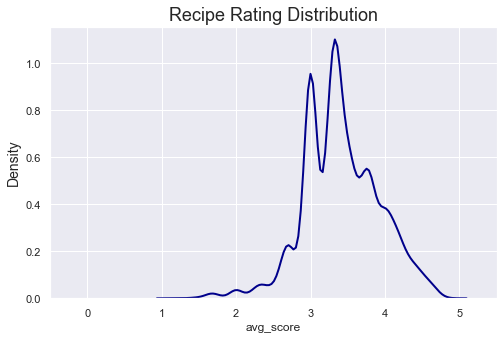

In [9]:
# delete the recipes, which have no average score.
df_null_score = df[df['avg_score'] =='0']
index_s = df_null_score.index.tolist()
df_avg = df.drop(index =index_s)
df_avg

avg_count = df_avg['avg_score'].value_counts()
df_count = avg_count.to_frame()
df_count
list_score = avg_count.index.tolist()
list_score
d = df_avg['avg_score'].value_counts()
list_count = d.values.tolist()
list_count

from pandas.core.frame import DataFrame
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set()
sns.distplot(df_avg['avg_score'],hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# plt.grid(linestyle='-.')
plt.title('Recipe Rating Distribution', fontsize=18)
plt.xlim(-0.5,5.5,0.8)
plt.ylabel('Density',fontsize=14)
plt.show()



# preparation time of recipes in different kinds of drinks

In [10]:
# delete recipes, which has the most high preparation time but only one
df_time = df.groupby('preparation_time').filter(lambda x: len(x) > 10)

# divide the recipes into different preparation time groups
def pre_time_group(pre_time):   
    pre_time = int(pre_time)    
    if pre_time < 20:
        bucket = '<20 Min'    
    if pre_time in range(20, 41):
        bucket = '20-40 Min'        
    if pre_time in range(40, 61):
        bucket = '40-60 Min'        
    if pre_time in range(60, 81):
        bucket = '50-59 Min'
    if pre_time >= 81:
        bucket = '80+ Min'
    return bucket

df_time['pretime_group'] = df_time['pre_time'].apply(pre_time_group)
# df_time = df_time['pre_time']
df_time


/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,pretime_group
recipe_id,,,,,,,,,,,,,,
1769081286862304,0,Getränke,Bananendrink 2. Art,shake,3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,none,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...,5,<20 Min
3012431454075648,1,Getränke,Obst-Smoothie mit Avocado und Ingwer,shake,3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...,5,<20 Min
38671013004033,2,Getränke,Baccardibowle,bowle,3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...,10,<20 Min
2338891372270191,3,Getränke,Russian Bahama Mama,cocktail,3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...,2,<20 Min
1825151296038527,4,Getränke,Pfirsich - Bananen - Smoothie,shake,3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...,5,<20 Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087751337250043,14529,Getränke,Brombeerlikör mit innerer Glut,likör,4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,none,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...,45,40-60 Min
169051073397375,14530,Getränke,Cappucino Longata Speziale,kaffee&tee&kakao,4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...,10,<20 Min
2786451430770696,14531,Getränke,Capt'n Cockienov,cocktail,4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...,2,<20 Min


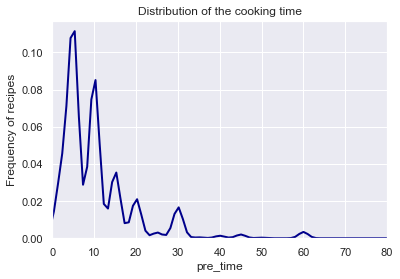

In [11]:
threshold=80
ax = sns.distplot(df_time['pre_time'],hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set_ylabel('Frequency of recipes')
ax.set_title('Distribution of the cooking time')
a = ax.set_xlim((0,threshold))


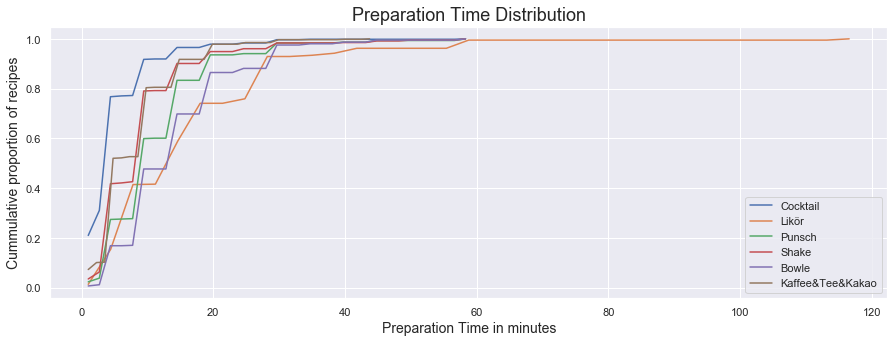

In [12]:
from pandas.core.frame import DataFrame
# Plot the cooking time's cumulative distribution for a sample of european and asian countries.
plt.figure(figsize=(15,5))
x1 = list(df_time[df_time['tags'] == 'cocktail']['pre_time'])
x2 = list(df_time[df_time['tags'] == 'likör']['pre_time'])
x3 = list(df_time[df_time['tags'] == 'punsch']['pre_time'])
x4 = list(df_time[df_time['tags'] == 'shake']['pre_time'])
x5 = list(df_time[df_time['tags'] == 'bowle']['pre_time'])
x6 = list(df_time[df_time['tags'] == 'kaffee&tee&kakao']['pre_time'])

pretime_sample = pd.concat([pd.DataFrame({'cocktail': x1}), 
                            pd.DataFrame({'likör':x2}), 
                            pd.DataFrame({'punsch':x3}),
                            pd.DataFrame({'shake':x4}),
                            pd.DataFrame({'bowle':x5}),
                            pd.DataFrame({'kaffee&tee&kakao':x6})], axis=1)
pretime_sample = pretime_sample.dropna()
pretime_sample
# For each cuisine compute the cumulative distribution of the preparation time and plot it.
for item in pretime_sample:
    pre = pretime_sample[item].astype(np.float)
    prep_times = pretime_sample[item].astype(np.float)
    values, base = np.histogram(prep_times, bins=35)
    # Compute the cumulative distribution
    cumulative = np.cumsum(values)
    cumulative = cumulative/cumulative.max()
    ax = plt.plot(base[:-1], cumulative)

plt.ylabel("Cummulative proportion of recipes", fontsize=14)
plt.xlabel("Preparation Time in minutes", fontsize=14)
plt.legend([c_title.title() for c_title in pretime_sample])
plt.title('Preparation Time Distribution',fontsize=18)
plt.grid(True)

In [13]:
# cummulative proportion graoh refers to https://alioben.github.io/yummly/

In [14]:
# Make a separate list for each kind of drinks
# x1 = list(df_time[df_time['sub_categorize'] == 'alkoholfrei']['pre_time'])

# x2 = list(df_time[df_time['sub_categorize'] == 'Longdrink']['pretime_group'])
# x3 = list(df_time[df_time['sub_categorize'] == 'Likör']['pretime_group'])
# x4 = list(df_time[df_time['sub_categorize'] == 'Punsch']['pretime_group'])
# x5 = list(df_time[df_time['sub_categorize'] == 'Shake']['pretime_group'])
# x6 = list(df_time[df_time['sub_categorize'] == 'Bowle']['pretime_group'])
# x7 = list(df_time[df_time['sub_categorize'] == 'KaffeeTeeoderKakao']['pretime_group'])

# # Assign colors for each type and the names
# colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#A569BD','#E74C3C']
# names = ['alkoholfrei', 'Longdrink', 'Likör',
#          'Punsch', 'Shake','Bowle','Kaffee&Tee&Kakao']
         
# # Make the histogram using a list of lists
# # Normalize the frequency of recipes and assign colors and names
# plt.figure(figsize=(9, 6))
# plt.hist([x1, x2, x3, x4, x5,x6,x7], bins = int(100/15), normed=True,
#          color = colors, label=names)

# # Plot formatting
# plt.legend()
# plt.xlabel('Pre_time(min)')
# plt.ylabel('Normed recipes')
# plt.title('Preparation Time Distribution',fontsize=18)

In [15]:

def extract_com_user(data):
    df_com = pd.DataFrame()
    for index, item in data_com['comment_user'].iteritems():
        if (item != '[]'):
            if (item != 'no comment'):
                array = ast.literal_eval(item)
                df_array = pd.DataFrame(array)
                df_array['recipe_id'] = index
                df_com = pd.concat([df_com,df_array])
    return df_com

In [16]:
def sub_cat_in_com(data):
    list_sub_cat = []
    df_com2 = pd.DataFrame()
    for index, item in data_com['tags'].iteritems(): 

        if (item != '[]'):
            list_sub = list(item)
            list_sub = ''.join(x for x in list_sub if x not in punct)
            list_sub_cat.append(list_sub)
    df_sub_cat = pd.DataFrame(list_sub_cat)
    df_sub_cat['tags'] = df_sub_cat
    df_sub_cat['recipe_id'] = data_com['tags'].index     
    df_com2 = pd.concat([df_com2,df_sub_cat])
    return df_com2

In [136]:
data_com = df[['comment_user','tags']]
data_com = data_com[0:600]
df_com = extract_com_user(data_com['comment_user'])
df_com2 = sub_cat_in_com(data_com['tags'])

df_com_new = df_com.merge(df_com2, on='recipe_id', how='left')
df_com_new = df_com_new.set_index(["recipe_id"])
# df_com_new = df_com_new.dropna([])
df_com_new
df_null_age = df_com_new[df_com_new['age'] =='None']
df_null_age
index_a = df_null_age.index.tolist()
df_age = df_com_new.drop(index =index_a)
df_age["age_num"] = df_age["age"].str.extract(pat, flags=0, expand=True)
df_age
# age_count = df_age['age'].value_counts()
# age_count

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rating,comment_time,name,sex,age,marriage_status,job,0,tags,age_num
recipe_id,,,,,,,,,,
3175441472580330,rating-5,23.11.2019 19:05,Superkoch-kathimaus,weiblich,33 Jahre,Verheiratet,None,shake,shake,33
3175441472580330,rating-5,12.08.2019 14:12,Hobbykoch-Bine68,weiblich,51 Jahre,Vergeben,None,shake,shake,51
3175441472580330,rating-4,23.06.2019 15:54,Bebberle,weiblich,50 Jahre,Vergeben,Sachbearbeiterin,shake,shake,50
3175441472580330,rating-4,15.08.2017 13:58,gloryous,weiblich,34 Jahre,Vergeben,Wissenschaftliche Mitarbeiterin,shake,shake,34
3175441472580330,rating-4,06.09.2016 21:56,Mamamummel,weiblich,66 Jahre,Verheiratet,Familienboss,shake,shake,66
...,...,...,...,...,...,...,...,...,...,...
1593181266614109,rating-4,09.09.2016 16:58,ulkig,weiblich,60 Jahre,None,None,shake,shake,60
1593181266614109,rating-4,04.09.2010 18:52,drelli,weiblich,64 Jahre,None,Altenpflegerin,shake,shake,64
998751205226732,rating-4,24.05.2012 16:09,gloryous,weiblich,34 Jahre,Vergeben,Wissenschaftliche Mitarbeiterin,shake,shake,34


In [109]:
def age_group(age):   
    age = int(age)    
    if age < 30:
        bucket = '<30 Jahre'    
    if age in range(30, 41):
        bucket = '30-40 Jahre'        
    if age in range(40, 51):
        bucket = '40-50 Jahre'        
    if age in range(50, 61):
        bucket = '50-60 Jahre'
    if age >= 61:
        bucket = '60+ Jahre'
    return bucket

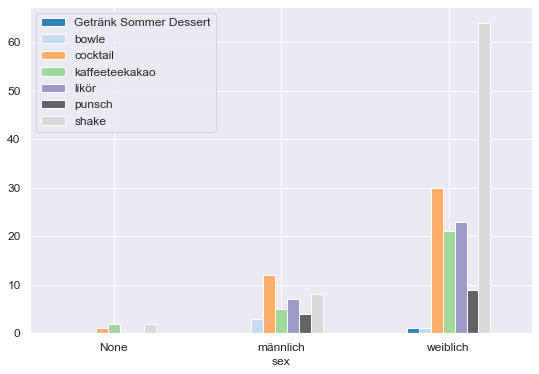

In [163]:

# df_age['sex'].dropna()
group_sex = df_age.groupby(['sex','tags']).count()
# group_sex = group_sex.groupby(level='sex').count()

from matplotlib.pyplot import *
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list('tab20c',colors)
group_sex = group_sex['rating']
# group_sex.loc['männlich','rating']
# group_sex.loc['weiblich','rating']
fig, ax = subplots()
group_sex.unstack().plot(kind='bar',ax=ax, fontsize = 12,figsize=(9,6),rot=0, colormap='tab20c')
# colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#A569BD','#E74C3C']
ax.legend(fontsize=12)

# group_sex.unstack().plot(kind='bar', stacked=True)

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


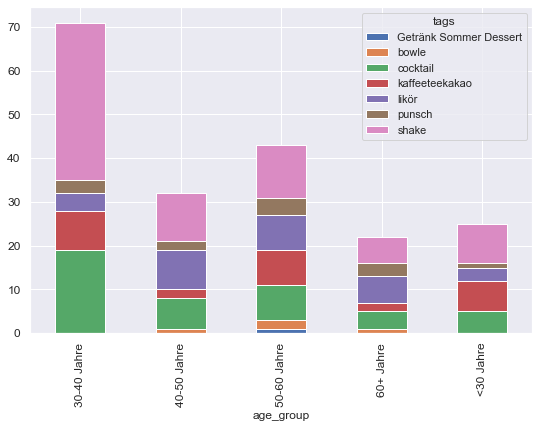

In [138]:
df_age['age_group'] = df_age['age_num'].apply(age_group)
df_age
group_age = df_age.groupby(['age_group','tags']).count()
group_age = group_age['rating']

# group_age.unstack().plot(kind='bar')
group_age.unstack().plot(kind='bar', stacked=True,figsize=(9,6), fontsize = 12)


KeyError: 'tags'

In [20]:
df_age['age_group'] = df_age['age_num'].apply(age_group)
df_age

# x1 = list(df_age[df_age['sub_categorize'] == 'alkoholfrei']['age_group'])
# x2 = list(df_age[df_age['sub_categorize'] == 'Longdrink']['age_group'])
# x3 = list(df_age[df_age['sub_categorize'] == 'Likör']['age_group'])
# x4 = list(df_age[df_age['sub_categorize'] == 'Punsch']['age_group'])
# x5 = list(df_age[df_age['sub_categorize'] == 'Shake']['age_group'])
# x6 = list(df_age[df_age['sub_categorize'] == 'Bowle']['age_group'])
# x7 = list(df_age[df_age['sub_categorize'] == 'KaffeeTeeoderKakao']['age_group'])


# labels = ['<30 Jahre', '30-40 Jahre', '40-50 Jahre', '50-60 Jahre', '60+ Jahre']
# width = 0.35
# fig, ax = plt.subplots()
# ax.bar(labels, x1, width, label='alkoholfrei')
# ax.bar(labels, x2, width, bottom=men_means,
#        label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rating,comment_time,name,sex,age,marriage_status,job,0,tags,age_num,age_group
recipe_id,,,,,,,,,,,
3175441472580330,rating-5,23.11.2019 19:05,Superkoch-kathimaus,weiblich,33 Jahre,Verheiratet,None,shake,shake,33,30-40 Jahre
3175441472580330,rating-5,12.08.2019 14:12,Hobbykoch-Bine68,weiblich,51 Jahre,Vergeben,None,shake,shake,51,50-60 Jahre
3175441472580330,rating-4,23.06.2019 15:54,Bebberle,weiblich,50 Jahre,Vergeben,Sachbearbeiterin,shake,shake,50,50-60 Jahre
3175441472580330,rating-4,15.08.2017 13:58,gloryous,weiblich,34 Jahre,Vergeben,Wissenschaftliche Mitarbeiterin,shake,shake,34,30-40 Jahre
3175441472580330,rating-4,06.09.2016 21:56,Mamamummel,weiblich,66 Jahre,Verheiratet,Familienboss,shake,shake,66,60+ Jahre
1875031304861947,rating-4,10.06.2018 11:55,Flauii,weiblich,29 Jahre,Verheiratet,None,kaffeeteekakao,kaffeeteekakao,29,<30 Jahre
1875031304861947,rating-4,06.03.2016 19:49,janpign,männlich,19 Jahre,None,None,kaffeeteekakao,kaffeeteekakao,19,<30 Jahre
1875031304861947,rating-4,14.08.2011 18:14,khan01_de,männlich,53 Jahre,Verheiratet,Freund mit Helfersyndrom,kaffeeteekakao,kaffeeteekakao,53,50-60 Jahre
875881193035640,rating-5,10.03.2008 12:19,kuchenmami,weiblich,50 Jahre,Verheiratet,Hausfrau,shake,shake,50,50-60 Jahre
